# Tutorial Objective: How To Create Mock/Fake/Simulated Astronomical Soucrces: Stars/Galaxies?

##### Step-1: Import required library

In [60]:
import numpy as np # deals with number and arrays
from astropy.io import fits #----fits file i/p
import matplotlib.pyplot as ply #---------data visualization'
from astropy.modeling.functional_models import Gaussian2D,Sersic2D # modeling of star + galaxy

##### Step-2: Create canvas: image size and pixel size

In [61]:
# def image pixel  size
size=300 
# create 2D meshgrid
x,y=np.meshgrid(np.arange(300),np.arange(300))
x.shape # my image pixel size is 300x300

(300, 300)

##### Step-3: Create star image with Gaussian 2D model

In [62]:
star=Gaussian2D(amplitude=5,x_mean=200,y_mean=200,x_stddev=5,y_stddev=5)
# create star image from  model
star_image=star(x,y)
star_image

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.76969651e-163, 3.58220401e-165, 6.96674729e-167],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        3.58220401e-165, 7.25106564e-167, 1.41020282e-168],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        6.96674729e-167, 1.41020282e-168, 2.74259272e-170]])

##### Step-4: create a galaxy image with sersic model

In [63]:
galaxy=Sersic2D(amplitude=0.5,r_eff=50,n=5,x_0=100,y_0=100,theta=np.deg2rad(0),ellip=0.5)
galaxy

<Sersic2D(amplitude=0.5, r_eff=50., n=5., x_0=100., y_0=100., ellip=0.5, theta=0.)>

In [64]:
# create galaxy image data as 2D\
galaxy_image=galaxy(x,y)
galaxy_image

array([[0.01707289, 0.01716193, 0.01725085, ..., 0.00930163, 0.00923834,
        0.00917544],
       [0.01743381, 0.01752605, 0.01761819, ..., 0.00943138, 0.00936662,
        0.00930227],
       [0.01780399, 0.01789958, 0.01799507, ..., 0.00956282, 0.00949656,
        0.00943073],
       ...,
       [0.00325771, 0.00326349, 0.00326922, ..., 0.00256723, 0.00255944,
        0.00255165],
       [0.00321243, 0.00321807, 0.00322368, ..., 0.0025363 , 0.00252866,
        0.00252102],
       [0.00316793, 0.00317345, 0.00317893, ..., 0.00250581, 0.00249832,
        0.00249083]])

##### Step-5: Combine star + galaxy images

In [65]:
mock_image=star_image+ galaxy_image
mock_image

array([[0.01707289, 0.01716193, 0.01725085, ..., 0.00930163, 0.00923834,
        0.00917544],
       [0.01743381, 0.01752605, 0.01761819, ..., 0.00943138, 0.00936662,
        0.00930227],
       [0.01780399, 0.01789958, 0.01799507, ..., 0.00956282, 0.00949656,
        0.00943073],
       ...,
       [0.00325771, 0.00326349, 0.00326922, ..., 0.00256723, 0.00255944,
        0.00255165],
       [0.00321243, 0.00321807, 0.00322368, ..., 0.0025363 , 0.00252866,
        0.00252102],
       [0.00316793, 0.00317345, 0.00317893, ..., 0.00250581, 0.00249832,
        0.00249083]])

##### Step-6: Visualize mock images

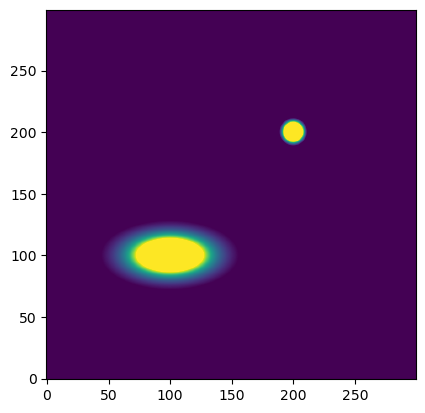

In [66]:
plt.imshow(mock_image,origin='lower',vmin=0.4,vmax=1.5)

##### Step-7: Save mock images in FITS file format

In [68]:
fits.writeto('mock_image.fits',mock_image,overwrite=True)

In [69]:
ls *fits

 Volume in drive C is OS
 Volume Serial Number is 9019-9C71

 Directory of C:\Users\JPrakash\Documents\coding

23-05-2024  19:05         3,427,200 .~r.fits
15-02-2025  12:36         6,405,120 flux_map.fits
03-04-2024  10:53        12,447,360 frame-i-005071-3-0347.fits
25-05-2024  15:54        12,447,360 frame-r-003918-3-0213.fits
03-04-2024  10:54        12,447,360 frame-z-005071-3-0347.fits
25-01-2025  19:30           192,960 fuv_star_cutout.fits
11-05-2024  23:14     1,555,611,840 J0210_cube.fits
05-12-2020  05:44       107,870,400 manga-11863-1901-LOGCUBE.fits
06-12-2020  09:50       158,328,000 manga-12510-1902-LINCUBE.fits
24-05-2024  18:00       442,800,000 manga-7443-12703-LINCUBE.fits
03-12-2020  04:40       514,362,240 manga-7443-12703-LOGCUBE.fits
02-08-2024  22:46         2,203,200 masked_fits.fits
03-08-2024  00:28         2,208,960 masked_pixel.fits
13-09-2024  20:21           129,600 masked_spectrum.fits
27-02-2025  13:30           722,880 mock_image.fits
21-05-2024  13:1